### Importing libraries

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Feature Scaling

In [301]:
def featureScaling(x):
    mu = np.average(x,axis =0)
    mu = mu.reshape(mu.shape[0],1)
    mu = mu.transpose()
    s = np.max(x,axis=0) - np.min(x,axis=0)
    s = s.reshape(s.shape[0],1)
    s = s.transpose()
    for c in range(np.size(x,0)):
        x[c,:] = np.divide(np.subtract(x[c,:],mu),s)
    return x    

### Hypoteshis 

In [302]:
def hypothesis(thetha,x):
    return np.dot(x,thetha)

### Cost Function

In [303]:
def computeCost(x,y,m,n,thetha):
    y1 = hypothesis(thetha,x)
    return np.sum(np.square(y1-y))/(2*m)
    

### Gradient Descent

In [304]:
def gradientDescent(x,y,m,n,thetha,alpha,i):
    J=[]
    k=0
    while(k<i):
        y1 = hypothesis(thetha,x)
        thetha = thetha - (alpha/m)*np.dot(x.transpose(),y1-y)
        j=computeCost(x,y,m,n,thetha)
        J.append(j)
        k+=1
    return J, j, thetha


### Main()

In [305]:
#main fn()
df = pd.read_csv("CarPrice_Assignment.csv")
#training data
data1 = df[['carlength', 'carwidth', 'carheight', 'enginesize', 'stroke', 'horsepower', 'price']].copy()
data = data1.sample(frac=0.80)
testingData = data1.drop(data.index) 
data = data.sort_index()
data = data.reset_index(drop=True)
x = data.drop(columns='price')
y = data[['price']].copy()
x = x.to_numpy()
y = y.to_numpy()
x = featureScaling(x)
y = featureScaling(y)
m = np.size(x,0)
n = np.size(x,1)
thetha = np.array([0]*n)
thetha = thetha.reshape(thetha.shape[0],1)
J, j, thetha = gradientDescent(x, y,m,n,thetha, 0.02, 5000)

### Plotting Cost Function

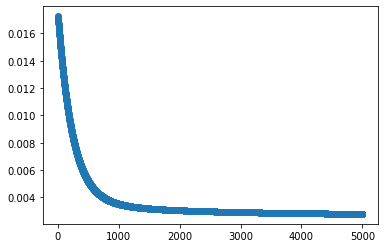

In [306]:
plt.scatter(x=list(range(0, 5000)), y=J)
plt.show()

### Predicting price for test data

In [307]:
testingData = testingData.sort_index()
testingData = testingData.reset_index(drop=True)
xtest = testingData.drop(columns='price')
ytest = testingData[['price']].copy()
xtest = xtest.to_numpy()
ytest = ytest.to_numpy()
ypred = hypothesis(thetha,xtest)

### Finding out mean squared error of the model

In [308]:
mse = (np.sum(np.square(ypred-ytest)))/np.size(ypred,0)
print("Mean squared error of the model:",mse)

Mean squared error of the model: 297893358.2182616


### Finding car price for Ishan Bawne

In [309]:
x2 = np.array([[190.9,70.3,54.9,183,3.64,123]])
print("Price of the car: ", hypothesis(thetha,x2))

Price of the car:  [[149.50640405]]
